In [ ]:
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install pandas
!pip install tensorflow
!pip install matplotlib
!pip install keras_preprocessing

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review_dataset = pd.read_csv('/content/drive/MyDrive/440 Dataset/IMDB Dataset.csv')
review_dataset.sample(10)

,review,sentiment
22392,"I got this movie with my BBC ""Jane Austen Coll...",positive
45040,"The biggest National Lampoon hit remains ""Anim...",negative
45441,"What a wonderful movie, eligible for so many l...",positive
40372,"I read the reviews of this movie, and they wer...",negative
21878,"Wow. I thought, Eskimo Limon was the most awfu...",negative
33122,I gave this movies a 7 out of 10. I think the ...,positive
3073,Now this is the sort of film we used to get we...,positive
35362,This is an amazing movie and is very clever at...,positive
37001,With great expectations I went to see this fil...,negative
25211,If this film had been directed by DW Griffith ...,positive


In [ ]:
review_dataset.isnull().values.any()

def preprocess_text(text):

    tokenizer = nltk.RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text.lower())

    stopwords_list = set(stopwords.words('english'))
    words = [word for word in words if word not in stopwords_list]

    return ' '.join(words)

review_dataset['review'] = review_dataset['review'].apply(preprocess_text)

In [ ]:
review_dataset['sentiment']=review_dataset['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
review_dataset.sample(10)

,review,sentiment
6139,rehearing carmen bizet middle aged choreograph...,1
23788,discovered ring trilogy greedily gobbling japa...,1
3018,well maybe immediately rodney king riots even ...,1
41967,got dvd cheap total drewbie thats probably con...,0
18758,okay first movie seemed pretty good even thoug...,0
32964,wonderful family drama comedy starring macclai...,1
11275,understand chinese took hong kong infamous cat...,1
3086,great movie think gets enough credit saturday ...,1
10424,get wrong assumed movie would stupid honestly ...,0
19770,although movie playing part sheriff hodges sti...,1


# TASK 1

In [ ]:
train_data, test_data = train_test_split(review_dataset, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['review'])
y_train = train_data['sentiment']
X_test = vectorizer.transform(test_data['review'])
y_test = test_data['sentiment']


In [ ]:
train_prop = len(train_data) / len(review_dataset['review'])
test_prop = len(test_data) / len(review_dataset['review'])

print("Training set proportion: {:.2f}".format(train_prop))
print("Test set proportion: {:.2f}".format(test_prop))

Training set proportion: 0.80
Test set proportion: 0.20


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logistic_regression.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
logistic_report = classification_report(y_test, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)


Accuracy: 0.8972
Confusion Matrix:
[[4372  589]
 [ 439 4600]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = multinomial_nb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
Multinomial_report = classification_report(y_test, y_pred, output_dict=True)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.8663
Confusion Matrix:
[[4364  597]
 [ 740 4299]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



[0.9, 0.87]


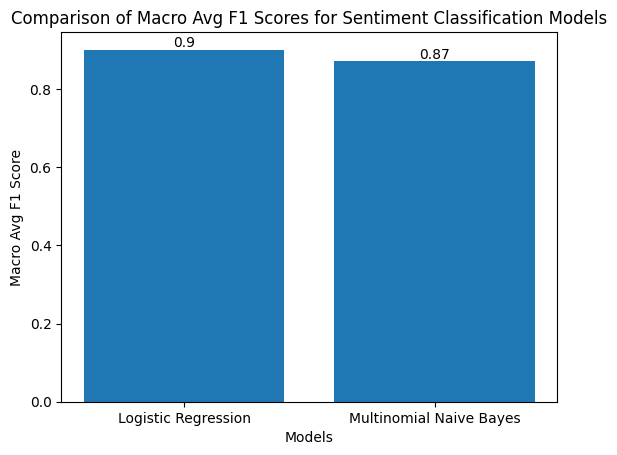

In [ ]:
logistic_f1 = logistic_report['macro avg']['f1-score']
multinomial_nb_f1 = Multinomial_report['macro avg']['f1-score']

# Data for the bar graph
models = ['Logistic Regression', 'Multinomial Naive Bayes']
f1_scores = [logistic_f1, multinomial_nb_f1]
f1_scores = [round(x, 2) for x in f1_scores]
print(f1_scores)

for i, v in enumerate(f1_scores):
  plt.text(i, v, str(v), ha='center', va='bottom')

# Create the bar graph
plt.bar(models, f1_scores)
plt.xlabel('Models')
plt.ylabel('Macro Avg F1 Score')
plt.title('Comparison of Macro Avg F1 Scores for Sentiment Classification Models')

# Display the bar graph
plt.show()


From the Macro Avg score above we can clearly say that logistic regression is better in this scenario. Because Losgistic Regression has a higher accuracy. This might be because naive bayes assumes all features are independent which is simply not true.

# TASK 2

In [ ]:
train, test_val = train_test_split(review_dataset, test_size=0.3, random_state=42)
test, val = train_test_split(test_val, test_size=0.333, random_state=42)

In [ ]:
train_prop = len(train) / len(review_dataset)
val_prop = len(val) / len(review_dataset)
test_prop = len(test) / len(review_dataset)

print("Training set proportion: {:.2f}".format(train_prop))
print("Validation set proportion: {:.2f}".format(val_prop))
print("Test set proportion: {:.2f}".format(test_prop))

Training set proportion: 0.70
Validation set proportion: 0.10
Test set proportion: 0.20


In [ ]:
rnn_word_tokenizer = Tokenizer()
rnn_word_tokenizer.fit_on_texts(train['review'])
vocab_size = len(rnn_word_tokenizer.word_index) + 1

In [ ]:

X_train = pad_sequences(rnn_word_tokenizer.texts_to_sequences(train['review']))
X_test = pad_sequences(rnn_word_tokenizer.texts_to_sequences(test['review']))
X_val = pad_sequences(rnn_word_tokenizer.texts_to_sequences(val['review']))
y_train = train['sentiment']
y_test = test['sentiment']
y_val = val['sentiment']

In [ ]:
# Load the pre-trained GloVe embeddings

embedding_dict = {}
with open('/content/drive/MyDrive/440 Dataset/glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vector

In [ ]:
# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in rnn_word_tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# Build the RNN model

RNN_model = Sequential()
RNN_model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False))
RNN_model.add(LSTM(64))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         8775300   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,817,605
Trainable params: 42,305
Non-trainable params: 8,775,300
_________________________________________________________________


In [ ]:

# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
RNN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64, verbose=1)


Epoch 1/25
547/547 [==============================] - 32s 46ms/step - loss: 0.4732 - accuracy: 0.7742 - val_loss: 0.4443 - val_accuracy: 0.7982
Epoch 2/25
547/547 [==============================] - 25s 46ms/step - loss: 0.3739 - accuracy: 0.8346 - val_loss: 0.3476 - val_accuracy: 0.8458
Epoch 3/25
547/547 [==============================] - 24s 44ms/step - loss: 0.3244 - accuracy: 0.8611 - val_loss: 0.3191 - val_accuracy: 0.8631
Epoch 4/25
547/547 [==============================] - 24s 44ms/step - loss: 0.2992 - accuracy: 0.8749 - val_loss: 0.2990 - val_accuracy: 0.8739
Epoch 5/25
547/547 [==============================] - 24s 45ms/step - loss: 0.2760 - accuracy: 0.8874 - val_loss: 0.3184 - val_accuracy: 0.8641
Epoch 6/25
547/547 [==============================] - 24s 44ms/step - loss: 0.2601 - accuracy: 0.8942 - val_loss: 0.2911 - val_accuracy: 0.8797
Epoch 7/25
547/547 [==============================] - 24s 43ms/step - loss: 0.2432 - accuracy: 0.9015 - val_loss: 0.2850 - val_accuracy:

313/313 [==============================] - 5s 14ms/step


Text(50.722222222222214, 0.5, 'Truth')

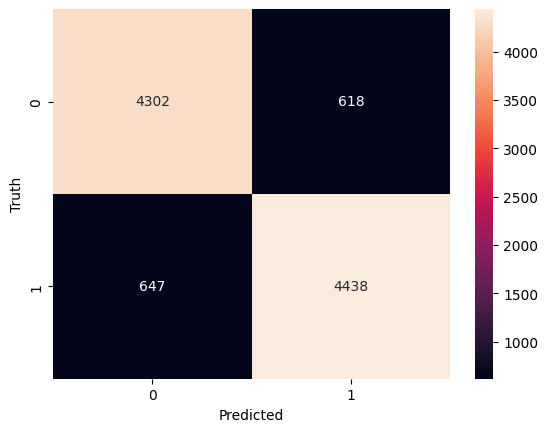

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import sys
import numpy as np
import seaborn as sn
np.set_printoptions(threshold=sys.maxsize)
y_pred = RNN_model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4920
           1       0.88      0.87      0.88      5085

    accuracy                           0.87     10005
   macro avg       0.87      0.87      0.87     10005
weighted avg       0.87      0.87      0.87     10005



F1 Scores of the Models:
Logistic Regression: 0.9
Multinomial Naive Bayes: 0.87
RNN: 0.87
We can see here that the clear winner is Logistic Regression and in second place are RNN and Multinomial Naive Bayes with both of them having equal scores of 0.87.